## Linear Classifiers in Python

### CHAPTER 1. Applying logistic regression and SVM

#### 1.1 scikit-learn refresher

**Prerequisites**:
1. Intermediate Python
2. Supervised learning with scikit-learn

* Practice with an example of KNN model as a refresher

In [2]:
# refresher of fitting and predicting with KNN
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# get dataset
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# create KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# model evaluation
knn.score(X_test, y_test)

(11314, 130107)
(11314,)


E:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6733828207847296

#### 1.2 Applying logistic regression and SVM

* In scikit-learn package, there are two basic linear classifiers:
1. Logistic regression
2. LinearSVC in SVM

Model complexity overview:
* **Underfitting**: model is too simple, low training accuracy
* **Overfitting**: model is too complex, low test accuracy

In [3]:
# Logistic Regression in scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.datasets

# get dataset
wine = sklearn.datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=21)

# create LR model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9473684210526315
1.0


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# predict probability of first observation for each class
lr.predict_proba(X_test[:1])

array([[9.99864255e-01, 1.30543301e-04, 5.20183970e-06]])

In [5]:
# LinearSVC in scikit-learn
from sklearn.svm import LinearSVC
import sklearn.datasets

# get dataset
wine = sklearn.datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=21)

# creat LinearSVC model
svm = LinearSVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.8421052631578947
0.9111111111111111


E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# SVC (non-linear) in scikit-learn
from sklearn.svm import SVC
import sklearn.datasets

# get dataset
wine = sklearn.datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=21)

# creat LinearSVC model
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.7142857142857143
0.5777777777777777


In [7]:
# sentiment analysis for movie reviews

# since the dataset is too big, I will skip this exercise and comment the following code:

# from sklearn.linear_model import LogisticRegression
# import pandas as pd

# get dataset
# reviews = pd.read_csv('')
# X =
# y =

# create a LR model
# lr = LogisticRegression()
# lr.fit(X, y)

In [8]:
# create a function to get features for text reviews

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
#
# def get_features(review):
#     return vectorizer.transform([review])


In [9]:
# predict sentiment for a glowing review

# review1 = "LOVED IT! This movie was amazing. Top 10 this year."
# review1_features = get_features(review1)
# print("Review:", review1)
# print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])
#
# # predict sentiment for a poor review
# review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
# review2_features = get_features(review2)
# print("Review:", review2)
# print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

#### 1.3 Linear classifiers

* Decision boundaries of linear classifiers are **linear**

In [22]:
# visualize linear decision boundaries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# get dataset
wine = sklearn.datasets.load_wine()
X, y = wine.data[:100:, :2], wine.target[:100]
print(X.shape)
print(y.shape)

# fit classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

for c in classifiers:
    c.fit(X, y)


(100, 2)
(100,)


E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
# create plot functions
import matplotlib.pyplot as plt
import numpy as np

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
    #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()


E:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


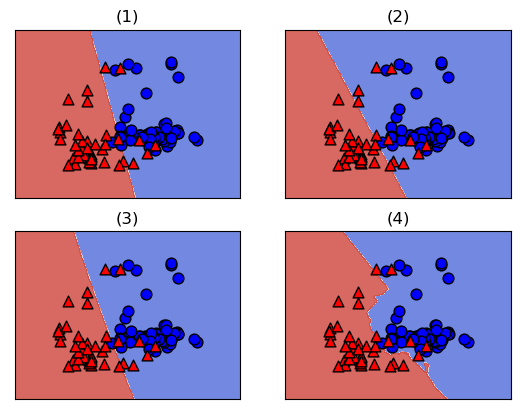

In [23]:
# plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

### CHAPTER 2. Loss functions

#### 2.1 Linear classifiers: the coefficients

Some **math backgrounds** to better understand linear classifier:
* **Dot products** of arrays / **(.)** in math
* Linear classifier prediction output = coefficients . features + intercept
* If positive, predict one class
* If negative, predict the other class

* For different linear classifiers, *fit* is different but *predict* is the same.
* *Fit* is related to loss functions

In [1]:
# dot products in Python
import numpy as np
x = np.arange(3)
y = np.arange(3,6)
print(x*y) # produce result array
print(np.sum(x*y)) # dot result

# alternative approach
print(x@y) # same result as above

[ 0  4 10]
14
14


In [2]:
# test different model coefficients
import numpy as np
from sklearn.linear_model import LogisticRegression

# make some data by hand
X = np.array([[ 1.78862847,  0.43650985],
              [ 0.09649747, -1.8634927 ],
              [-0.2773882 , -0.35475898],
              [-3.08274148,  2.37299932],
              [-3.04381817,  2.52278197],
              [-1.31386475,  0.88462238],
              [-2.11868196,  4.70957306],
              [-2.94996636,  2.59532259],
              [-3.54535995,  1.45352268],
              [ 0.98236743, -1.10106763],
              [-1.18504653, -0.2056499 ],
              [-1.51385164,  3.23671627],
              [-4.02378514,  2.2870068 ],
              [ 0.62524497, -0.16051336],
              [-3.76883635,  2.76996928],
              [ 0.74505627,  1.97611078],
              [-1.24412333, -0.62641691],
              [-0.80376609, -2.41908317],
              [-0.92379202, -1.02387576],
              [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
              -1, -1, -1])

# create LR model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [3]:
# create plot function
import matplotlib.pyplot as plt
import numpy as np

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
    #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

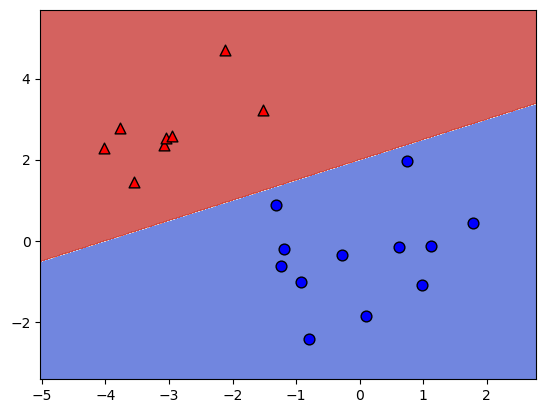

Number of errors:  0


In [6]:
# set the coefficients
model.coef_ = np.array([[-1, 2]])
model.intercept_ = np.array([-4])

# plot classifier
plot_classifier(X, y, model)

# print the number of arrays
num_err = np.sum(y != model.predict(X))
print("Number of errors: ", num_err)

#### 2.2 What is a loss function?

* Loss function is a penalty score that tells us how well or poorly the model is doing on the training data
* Example: Linear Regression model -> Ordinary Least Squares (OLS)
* Objective: Minimize this score by jiggling around the coefficients or parameters of the model
* For classification problems, the loss function is the **0-1 loss**: 0 for a correct prediction and 1 for an incorrect prediction

In [10]:
# minimize loss function in Python
from scipy.optimize import minimize
import numpy as np

# create data by hand
X = np.array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 1.5300e+01, 3.9690e+02,
                4.9800e+00],
               [2.7310e-02, 0.0000e+00, 7.0700e+00, 1.7800e+01, 3.9690e+02,
                9.1400e+00],
               [2.7290e-02, 0.0000e+00, 7.0700e+00, 1.7800e+01, 3.9283e+02,
                4.0300e+00]])
y = np.array([24. , 21.6, 34.7])

# create loss function def
def my_loss(w):
    s = 0
    for i in range(y.size):
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# calculate minimize
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[ -849.67712298  -537.93653867   856.0539714  -5198.24393613
   222.12566777  -179.47837975]


In [11]:
# compare with LR coefficients in scikit-learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)
# the results should be the same

[ 6.34612108e-04 -4.15910534e-01  1.51551703e-01  1.62416442e-01
  1.05407294e-01 -2.64755532e+00]


#### 2.3 Loss function diagrams

* Classification problems cannot just use squared 0-1 loss function.
* Logistic Regression uses a smooth version of the 0-1 loss
* SVM uses the hinge loss
* Both of these two loss functions penalize incorrect predictions

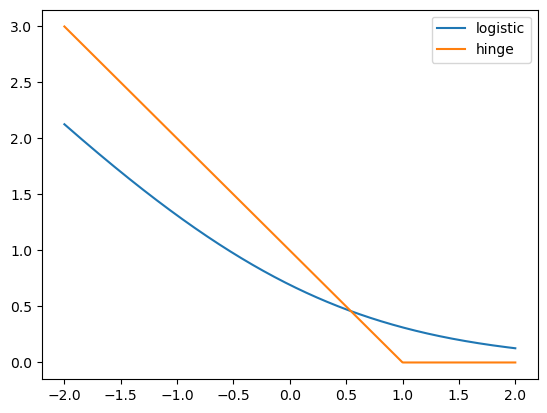

In [12]:
# comparing the logistic and hinge losses
import numpy as np
import matplotlib.pyplot as plt

# get defs for log_loss and hinge_loss
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# create a grid of values and plot
grid = np.linspace(-2, 2, 1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### CHAPTER 3. Logistic Regression

#### 3.1 Logistic regression and regularization

*